In [ ]:
import pandas as pd
import numpy as np

In [ ]:
new_data=pd.read_csv("zomato version 2.csv",encoding='latin-1')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60770 entries, 0 to 60769
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         56234 non-null  object
 1   online_order                 56232 non-null  object
 2   book_table                   56192 non-null  object
 3   rate                         48412 non-null  object
 4   votes                        56172 non-null  object
 5   location                     56126 non-null  object
 6   rest_type                    55912 non-null  object
 7   dish_liked                   28047 non-null  object
 8   cuisines                     56047 non-null  object
 9   approx_cost(for two people)  55743 non-null  object
 10  menu_item                    51683 non-null  object
 11  listed_in(type)              51654 non-null  object
 12  listed_in(city)              51625 non-null  object
dtypes: object(13)
memory usage: 6.0

# lets clean online order


In [ ]:
new_data['online_order'].unique()

array(['Yes', 'No', nan, ...,
       ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place',
       ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt',
       " 'RATED\\n  Beer cafe "], dtype=object)

In [ ]:
# Keep only 'Yes' and 'No' values in the 'online_order' column
new_data = new_data[new_data['online_order'].isin(['Yes', 'No'])]

new_data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
new_data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

# location is important :)

In [ ]:
new_data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [ ]:
new_data['location'].value_counts()

,count
location,
BTM,5124
HSR,2523
Koramangala 5th Block,2504
JP Nagar,2235
Whitefield,2144
...,...
West Bangalore,6
Yelahanka,6
Jakkur,3


In [ ]:
# Define a dictionary to map similar locations
location_mapping = {
    'Banashankari': 'South Bangalore',
    'Basavanagudi': 'South Bangalore',
    'Mysore Road': 'South Bangalore',
    'Jayanagar': 'South Bangalore',
    'Kumaraswamy Layout': 'South Bangalore',
    'Rajarajeshwari Nagar': 'South Bangalore',
    'Vijay Nagar': 'South Bangalore',
    'Uttarahalli': 'West Bangalore',
    'JP Nagar': 'South Bangalore',
    'City Market': 'Central Bangalore',
    'Bannerghatta Road': 'South Bangalore',
    'BTM': 'South Bangalore',
    'Kanakapura Road': 'South Bangalore',
    'Bommanahalli': 'South Bangalore',
    'Electronic City': 'South Bangalore',
    'Sarjapur Road': 'South East Bangalore',
    'Wilson Garden': 'South Bangalore',
    'Shanti Nagar': 'Central Bangalore',
    'Koramangala 5th Block': 'Koramangala',
    'Richmond Road': 'Central Bangalore',
    'HSR': 'South East Bangalore',
    'Koramangala 7th Block': 'Koramangala',
    'Bellandur': 'South East Bangalore',
    'Marathahalli': 'South East Bangalore',
    'Whitefield': 'East Bangalore',
    'Old Airport Road': 'East Bangalore',
    'Indiranagar': 'East Bangalore',
    'Koramangala 1st Block': 'Koramangala',
    'Frazer Town': 'East Bangalore',
    'MG Road': 'Central Bangalore',
    'Brigade Road': 'Central Bangalore'  # Assuming you meant Brigade Road
}

# Apply the mapping to the 'location' column
new_data['location'] = new_data['location'].map(location_mapping).fillna(new_data['location'])

# Print the updated value counts
print(new_data['location'].value_counts())

location
South Bangalore         14671
South East Bangalore     6720
East Bangalore           5444
Koramangala              4971
Central Bangalore        3593
                        ...  
Kengeri                     9
Nagarbhavi                  9
Yelahanka                   6
Jakkur                      3
Peenya                      1
Name: count, Length: 63, dtype: int64


<ipython-input-168-fe2af0a6fbc7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['location'] = new_data['location'].map(location_mapping).fillna(new_data['location'])


In [ ]:
# Remove locations with less than 400 restaurants
location_counts = new_data['location'].value_counts()
locations_to_keep = location_counts[location_counts >= 400].index
new_data = new_data[new_data['location'].isin(locations_to_keep)]

print(new_data['location'].value_counts())

location
South Bangalore          14671
South East Bangalore      6720
East Bangalore            5444
Koramangala               4971
Central Bangalore         3593
Koramangala 6th Block     1156
Ulsoor                    1023
Koramangala 4th Block     1017
Kalyan Nagar               853
Malleshwaram               725
Residency Road             675
Banaswadi                  664
Brookefield                658
New BEL Road               649
Kammanahalli               648
Rajajinagar                591
Church Street              569
Lavelle Road               529
Shivajinagar               499
Domlur                     496
Cunningham Road            491
Ejipura                    439
Name: count, dtype: int64


In [ ]:
new_data['location'].isna().sum()

0

I don't think anything wrong in this column


# lets see resturant type also important :)

In [ ]:
new_data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [ ]:
# combine same data resturants in rest_types

# Combine similar restaurant types
def combine_rest_types(rest_type):
    if pd.isna(rest_type):
        return np.nan  # Handle missing values

    rest_type = rest_type.lower()
    if 'quick bites' in rest_type:
        return 'Quick Bites'
    elif 'casual dining' in rest_type:
        return 'Casual Dining'
    elif 'cafe' in rest_type:
        return 'Cafe'
    elif 'delivery' in rest_type:
        return 'Delivery'
    elif 'bar' in rest_type:
      return 'Bar'
    elif 'fine dining' in rest_type:
      return 'Fine Dining'
    # Add more categories as needed
    else:
        return 'Others'  # Group other types into 'Others'


new_data['rest_type'] = new_data['rest_type'].apply(combine_rest_types)
new_data['rest_type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Others',
       'Fine Dining', 'Bar', nan], dtype=object)

In [ ]:
new_data['rest_type'].isna().sum()

176

In [ ]:
new_data['rest_type'].value_counts().sum()

46905

In [ ]:
# Drop rows with missing values in the 'rest_type' column
new_data = new_data.dropna(subset=['rest_type'])

In [ ]:
new_data['rest_type'].value_counts()

,count
rest_type,
Quick Bites,18835
Casual Dining,11901
Others,6935
Delivery,4155
Cafe,4007
Bar,750
Fine Dining,322


# dish liked


In [ ]:
new_data['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Vegetable Biryani, Non Veg Thali, Plain Rice, Chicken Pot Biryani, Naan',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [ ]:
new_data['dish_liked'].isna().sum()

25270

In [ ]:
new_data['dish_liked'].count()

21635

In [ ]:
# Drop the 'dish_liked' column
new_data = new_data.drop('dish_liked', axis=1)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46905 entries, 0 to 60767
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         46905 non-null  object
 1   online_order                 46905 non-null  object
 2   book_table                   46905 non-null  object
 3   rate                         39919 non-null  object
 4   votes                        46905 non-null  object
 5   location                     46905 non-null  object
 6   rest_type                    46905 non-null  object
 7   cuisines                     46881 non-null  object
 8   approx_cost(for two people)  46613 non-null  object
 9   menu_item                    42837 non-null  object
 10  listed_in(type)              42837 non-null  object
 11  listed_in(city)              42837 non-null  object
dtypes: object(12)
memory usage: 4.7+ MB


# cuisines


In [ ]:
new_data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai'],
      dtype=object)

In [ ]:
def combine_cuisines(cuisines):
    if pd.isna(cuisines):
        return np.nan

    cuisines = cuisines.lower()
    if 'north indian' in cuisines:
        return 'North Indian'
    elif 'south indian' in cuisines:
        return 'South Indian'
    elif 'chinese' in cuisines:
        return 'Chinese'
    elif 'fast food' in cuisines:
        return 'Fast Food'
    elif 'italian' in cuisines:
        return 'Italian'
    elif 'biryani' in cuisines:
        return 'Biryani'
    elif 'continental' in cuisines:
        return 'Continental'
    elif 'american' in cuisines:
        return 'American'
    elif 'mexican' in cuisines:
        return 'Mexican'
    # Add other cuisines as needed
    else:
        return 'Others'

new_data['cuisines'] = new_data['cuisines'].apply(combine_cuisines)

In [ ]:
new_data['cuisines'].value_counts()

,count
cuisines,
North Indian,19073
Others,10640
Fast Food,4987
South Indian,3555
Chinese,3270
Italian,1947
Continental,1545
Biryani,1531
American,269


In [ ]:
new_data['cuisines'].isna().sum()

24

In [ ]:
new_data = new_data.dropna(subset=['cuisines'])

In [ ]:
new_data['cuisines'].isna().sum()

0

# approx cost

In [ ]:
new_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700+', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '10,00', '12,00', '1500+', '1,300', '350+', '1,000', '199',
       '1,500', '80', '1,100', '160', '1,600', '700', '230', '130', '50',
       '190', '1,700', nan, '1,400', '180', '1,350', '2,200', '2,000',
       '1,800', '1,900', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '120',
       '1,450', '469', '70', '60', '560', '240', '6,000', '1,050',
       '2,300', '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
new_data['approx_cost(for two people)'].isna().sum()

287

In [ ]:
new_data = new_data.dropna(subset=['approx_cost(for two people)'])

In [ ]:
new_data['approx_cost(for two people)'].isna().sum()

0

In [ ]:
# Extract values containing "+" from the 'approx_cost(for two people)' column
plus_values = new_data[new_data['approx_cost(for two people)'].str.contains('\+', na=False)]['approx_cost(for two people)']

plus_values

,approx_cost(for two people)
16,700+
84,700+
96,700+
192,700+
195,700+
222,1500+
226,700+
233,350+
235,700+
263,700+


In [ ]:
#  remove the "+" sign
new_data['approx_cost(for two people)'] = new_data['approx_cost(for two people)'].str.replace('+', '', regex=False)
new_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '10,00', '12,00', '1500', '1,300', '1,000', '199', '1,500',
       '80', '1,100', '160', '1,600', '230', '130', '50', '190', '1,700',
       '1,400', '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330',
       '2,500', '2,100', '3,000', '2,800', '3,400', '40', '1,250',
       '3,500', '4,000', '2,400', '2,600', '120', '1,450', '469', '70',
       '60', '560', '240', '6,000', '1,050', '2,300', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
# Remove commas from 'approx_cost(for two people)' column
new_data['approx_cost(for two people)'] = new_data['approx_cost(for two people)'].str.replace(',', '', regex=False)

new_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', '1400', '180', '1350', '2200',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '60', '560', '240', '6000', '1050', '2300',
       '1650', '2700', '4500'], dtype=object)

In [ ]:
# Convert 'approx_cost(for two people)' to numeric
new_data['approx_cost(for two people)'] = pd.to_numeric(new_data['approx_cost(for two people)'], errors='coerce')



In [ ]:
new_data['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  550,  500,  450,  650,  700,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
         60,  560,  240, 6000, 1050, 2300, 1650, 2700, 4500])

In [ ]:
new_data['approx_cost(for two people)'].dtype

dtype('int64')

In [ ]:
new_data['approx_cost(for two people)'].isna().sum()

0

In [ ]:
new_data['menu_item'].unique()

array(['[]', nan,
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700+ Gms)', 

In [ ]:
new_data=new_data.drop('menu_item',axis=1)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46594 entries, 0 to 60767
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         46594 non-null  object
 1   online_order                 46594 non-null  object
 2   book_table                   46594 non-null  object
 3   rate                         39684 non-null  object
 4   votes                        46594 non-null  object
 5   location                     46594 non-null  object
 6   rest_type                    46594 non-null  object
 7   cuisines                     46594 non-null  object
 8   approx_cost(for two people)  46594 non-null  int64 
 9   listed_in(type)              42550 non-null  object
 10  listed_in(city)              42550 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
# Drop the useless column
new_data = new_data.drop('name', axis=1)
new_data = new_data.drop('rate', axis=1)
new_data = new_data.drop('votes', axis=1)
new_data = new_data.drop('listed_in(type)', axis=1)
new_data = new_data.drop('listed_in(city)', axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46594 entries, 0 to 60767
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 46594 non-null  object
 1   book_table                   46594 non-null  object
 2   location                     46594 non-null  object
 3   rest_type                    46594 non-null  object
 4   cuisines                     46594 non-null  object
 5   approx_cost(for two people)  46594 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


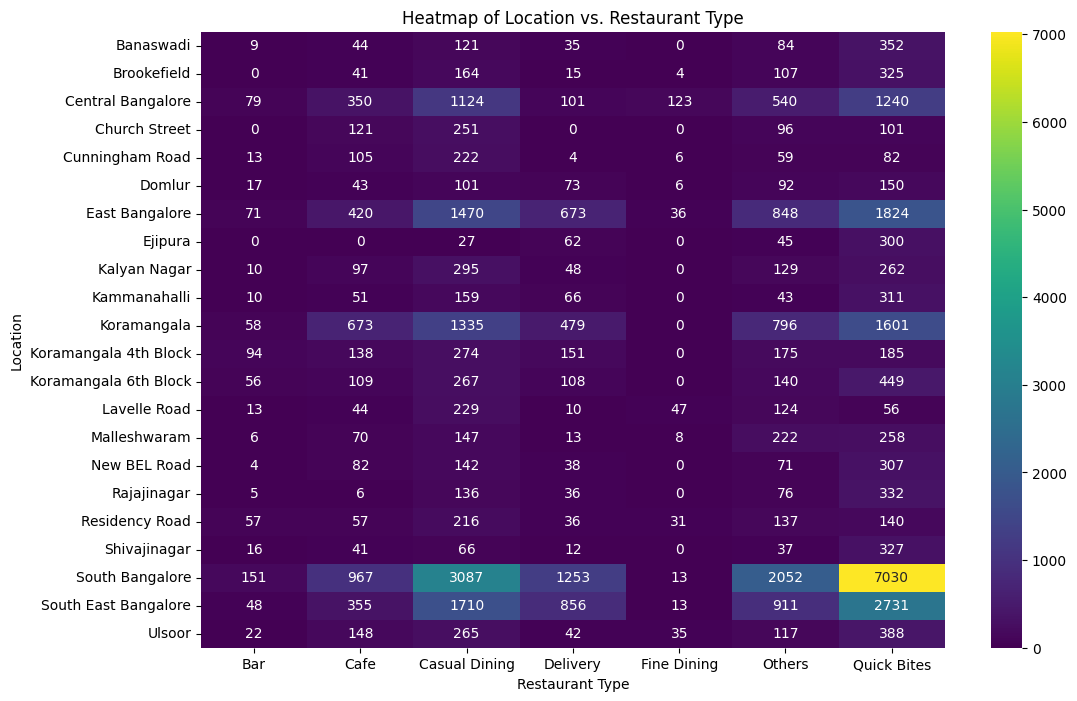

In [ ]:
#draw heatmap for location and rest_type

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 8))
location_rest_type = pd.crosstab(new_data['location'], new_data['rest_type'])
sns.heatmap(location_rest_type, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Location vs. Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Location')
plt.show()

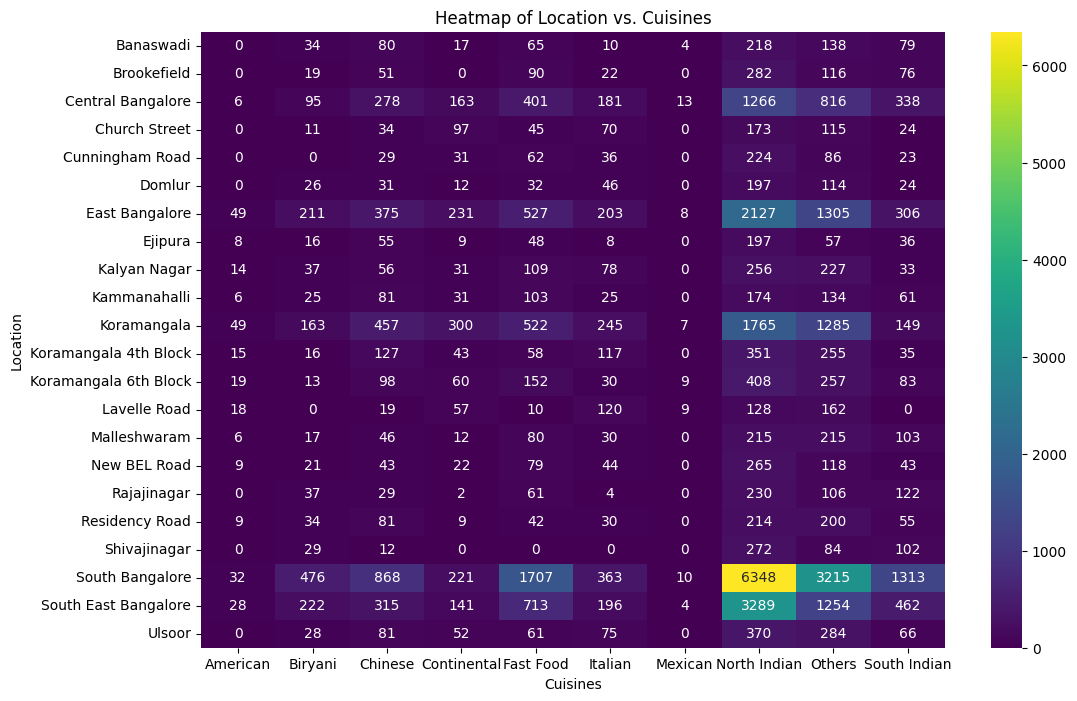

In [ ]:
# Create the heatmap for location and cuisines
plt.figure(figsize=(12, 8))
location_cuisine = pd.crosstab(new_data['location'], new_data['cuisines'])
sns.heatmap(location_cuisine, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Location vs. Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Location')
plt.show()

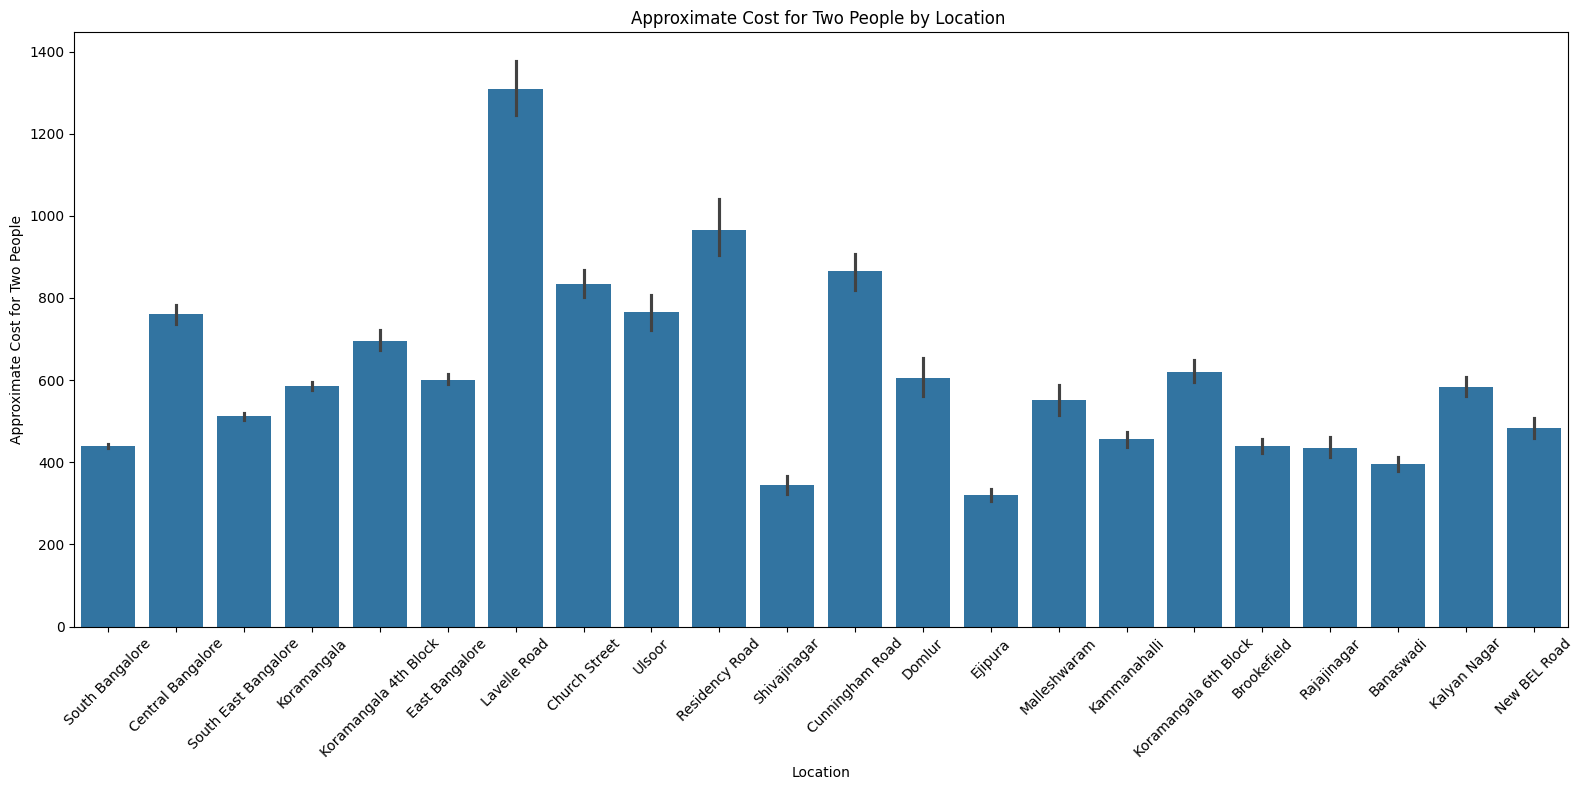

In [ ]:
#draw a bargraph using location and approx cost

# Create the bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='location', y='approx_cost(for two people)', data=new_data)
plt.title('Approximate Cost for Two People by Location ')
plt.xlabel('Location')
plt.ylabel('Approximate Cost for Two People')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()